# 🚗 Predicting the value of Cars using Machine Learning

In this project, we're going to focus on K-Nearest Neighbor(KNN) Classifier with a goal of predicting the value of cars.

## Problem Definition

> How well can we predict the future value of cars, given its characteristics and their cost of maintenance?

## Data

> This data is downloaded from Kaggle : https://www.kaggle.com/elikplim/car-evaluation-data-set

> It is also available in UCI Machine Learning Repository : https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

> Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

> **CAR car acceptability**
> * PRICE overall price
> * buying buying price
> * maint price of the maintenance

>**TECH technical characteristics**
> * COMFORT comfort
> * doors number of doors
> * persons capacity in terms of persons to carry
> * lug_boot the size of luggage boot
> * safety estimated safety of the car

## Features

>**Attribute Information:**

>Class Values:
> * unacc, acc, good, vgood

>Attributes:
> * buying: vhigh, high, med, low.
> * maint: vhigh, high, med, low.
> * doors: 2, 3, 4, 5more.
> * persons: 2, 4, more.
> * lug_boot: small, med, big.
> * safety: low, med, high.

In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [34]:
df = pd.read_csv('car_evaluation_ren.csv')
df.head()

,Buying_Price,Maintenance_Cost,No_of_Doors,No_of_Persons,Lug_Boot,Safety,Decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [35]:
df.shape

(1727, 7)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buying_Price      1727 non-null   object
 1   Maintenance_Cost  1727 non-null   object
 2   No_of_Doors       1727 non-null   object
 3   No_of_Persons     1727 non-null   object
 4   Lug_Boot          1727 non-null   object
 5   Safety            1727 non-null   object
 6   Decision          1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## Data Exploration (exploratory data analysis or EDA)

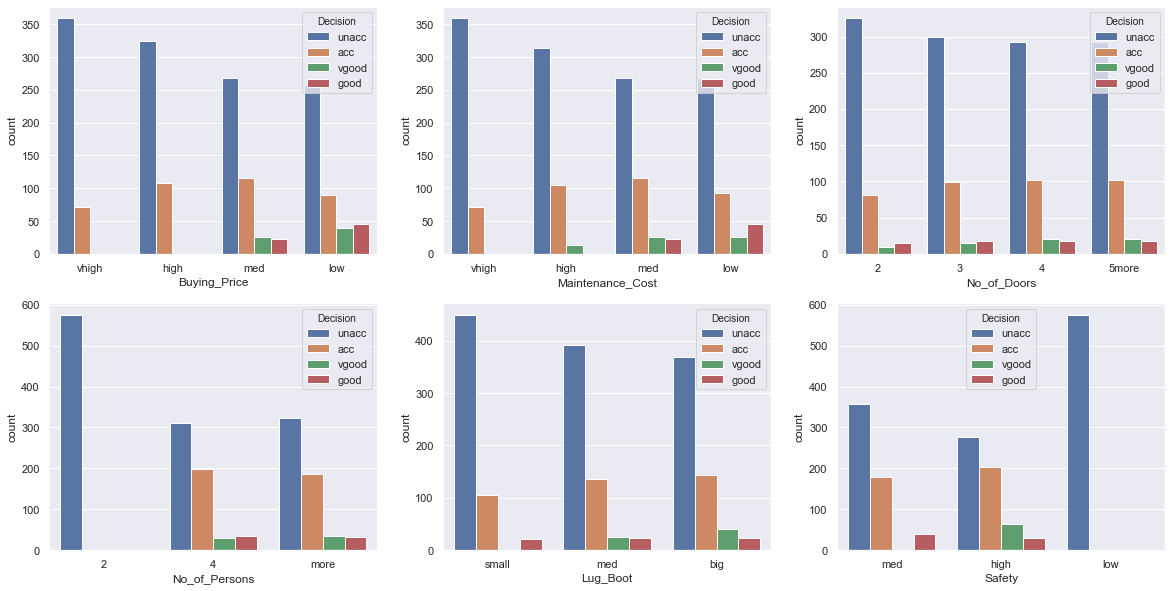

In [40]:
fig = plt.figure(figsize=(20,10))

fig.add_subplot(2,3,1)
sns.countplot(df['Buying_Price'],hue=df['Decision'])

fig.add_subplot(2,3,2)
sns.countplot(df['Maintenance_Cost'],hue=df['Decision'])

fig.add_subplot(2,3,3)
sns.countplot(df['No_of_Doors'], hue=df['Decision']);

fig.add_subplot(2,3,4)
sns.countplot(df['No_of_Persons'], hue=df['Decision'])

fig.add_subplot(2,3,5)
sns.countplot(df['Lug_Boot'], hue=df['Decision'])

fig.add_subplot(2,3,6)
sns.countplot(df['Safety'], hue=df['Decision']);

In [8]:
df.groupby('Buying_Price')['Decision'].value_counts()

Buying_Price  Decision
high          unacc       324
              acc         108
low           unacc       258
              acc          89
              good         46
              vgood        39
med           unacc       268
              acc         115
              vgood        26
              good         23
vhigh         unacc       359
              acc          72
Name: Decision, dtype: int64

In [42]:
df.groupby('No_of_Doors')['Decision'].value_counts()

No_of_Doors  Decision
2            unacc       325
             acc          81
             good         15
             vgood        10
3            unacc       300
             acc          99
             good         18
             vgood        15
4            unacc       292
             acc         102
             vgood        20
             good         18
5more        unacc       292
             acc         102
             vgood        20
             good         18
Name: Decision, dtype: int64

In [43]:
df['Decision'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: Decision, dtype: int64

## Convert string to Numbers

In [44]:
# Find the columns which contain strings and convert into categorical values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype('category').cat.as_ordered()
    # and then turn categories into numbers
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes+1
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Buying_Price      1727 non-null   int8 
 1   Maintenance_Cost  1727 non-null   int8 
 2   No_of_Doors       1727 non-null   int8 
 3   No_of_Persons     1727 non-null   int8 
 4   Lug_Boot          1727 non-null   int8 
 5   Safety            1727 non-null   int8 
 6   Decision          1727 non-null   int8 
dtypes: int8(7)
memory usage: 11.9 KB


## Modelling

We've done enough EDA (we could always do more) but lets start modeling...

In [45]:
# split data into X & y
X = df.drop('Decision', axis=1)
y = df['Decision']

# split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# instantiate a model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

# fit the data
model.fit(X_train, y_train)

# check the score
model.score(X_test, y_test)

0.8901734104046243

## Improve  the model

In [46]:
test_score = []

# Create a list different values for n neighbors
neighbors = range(1,21)

# setup KNN instance
knn = KNeighborsClassifier()

# Loop through different neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the testing score list
    test_score.append(knn.score(X_test, y_test ))

## Plotting the result

Maximum KNN score on test data : 90.75%


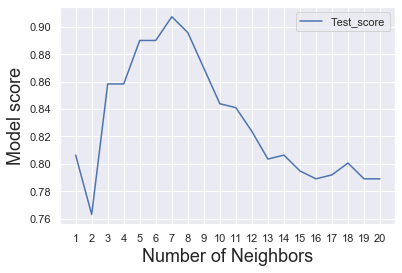

In [47]:
plt.plot(neighbors, test_score, label = 'Test_score')

plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of Neighbors', fontsize=18)
plt.ylabel('Model score', fontsize=18)
plt.legend()

print(f'Maximum KNN score on test data : {max(test_score)*100:.2f}%');

## Hyperparameter Tuning Using RandomizedSearchCV

In [52]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Create hyperparameter grid for KNN
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Use RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rs_knn = RandomizedSearchCV(KNeighborsClassifier(),
                            param_distributions= hyperparameters,
                            cv = 5,
                            n_iter=20,
                            verbose=True)

#Fit the model
rs_knn.fit(X_train,y_train)

#Print The value of best Hyperparameters
rs_knn.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 6.01 s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.7s finished


{'p': 1, 'n_neighbors': 5, 'leaf_size': 37}

In [53]:
# check the new score
rs_knn.score(X_test, y_test)

0.8901734104046243